In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import json
from pathlib import Path
import os
from fastai.core import parallel
import pickle
import gc
    
def inner(pths, i):
    inner_lab = {}
    pth, image_dir = pths
    image_dir = Path(image_dir)
    with open(pth, "r") as f:
        for line in f:
            example = json.loads(line)
            idd = example['id']
            f1 = "{:04d}".format((int(idd) % 1000))

            poth = image_dir/f1/(str(idd) + '.' + str(example['file_ext']))
            example['path'] = poth
            if poth.is_file():
                inner_lab[idd] = example
            else:
                continue
    with open(pth.parent/(pth.stem + 'tmp.pkl'), 'wb') as handle:
        pickle.dump(inner_lab, handle, protocol=pickle.HIGHEST_PROTOCOL)

def filter_labels(metadata_dir, image_dir):
    """ 
    Filters and merges all metadata in `metadata_dir` into a single json object,
    consisting of only the images you have in `image_dir`
    """
    meta_paths = [i for i in Path(metadata_dir).glob('**/*') if i.is_file()]
    meta_paths = [i for i in meta_paths if 'tmp' not in i.name]
    
    labels = {}
    
    col = [(pth, image_dir) for pth in meta_paths]
#     parallel(inner, col)

    return col
    
    #finished_paths = Path(metadata_dir).glob('*tmp.pkl')
    #for pth in finished_paths:
    #    with open(pth, 'rb') as handle:
    #        labels.update(pickle.load(handle))
    #    os.remove(pth)
        
    #return labels

col = filter_labels('danbooru2018/metadata/', 'danbooru2018/original/')
print(len(col))

34


In [40]:
gc.collect()
parallel(inner, col[32:], max_workers=2)
# inner(col[0], 0)
print("Done ", col[32:])

Done  [(PosixPath('danbooru2018/metadata/2018000000000015'), 'danbooru2018/original/'), (PosixPath('danbooru2018/metadata/2018000000000016'), 'danbooru2018/original/')]


In [5]:
finished_paths = list(Path('danbooru2018/metadata/').glob('**/*tmp.pkl'))
finished_paths = sorted(finished_paths, key=lambda x: x.name)
# print(finished_paths)
labels = {}

# for pth in finished_paths[0:10]:
#     with open(pth, 'rb') as handle:
#         labels.update(pickle.load(handle))

In [11]:
gc.collect()
for pth in finished_paths[20:]:
    with open(pth, 'rb') as handle:
        labels.update(pickle.load(handle))

In [8]:
for ii, i in enumerate(finished_paths):
    print(ii, i.name)

0 2017000000000000tmp.pkl
1 2017000000000001tmp.pkl
2 2017000000000002tmp.pkl
3 2017000000000003tmp.pkl
4 2017000000000004tmp.pkl
5 2017000000000005tmp.pkl
6 2017000000000006tmp.pkl
7 2017000000000007tmp.pkl
8 2017000000000008tmp.pkl
9 2017000000000009tmp.pkl
10 2017000000000010tmp.pkl
11 2017000000000011tmp.pkl
12 2017000000000012tmp.pkl
13 2017000000000013tmp.pkl
14 2017000000000014tmp.pkl
15 2017000000000015tmp.pkl
16 2017000000000016tmp.pkl
17 2018000000000000tmp.pkl
18 2018000000000001tmp.pkl
19 2018000000000002tmp.pkl
20 2018000000000003tmp.pkl
21 2018000000000004tmp.pkl
22 2018000000000005tmp.pkl
23 2018000000000006tmp.pkl
24 2018000000000007tmp.pkl
25 2018000000000008tmp.pkl
26 2018000000000009tmp.pkl
27 2018000000000010tmp.pkl
28 2018000000000011tmp.pkl
29 2018000000000012tmp.pkl
30 2018000000000013tmp.pkl
31 2018000000000014tmp.pkl
32 2018000000000015tmp.pkl
33 2018000000000016tmp.pkl


In [5]:
pth = s/'2017000000000000.json'

f = open(pth, 'r')

In [13]:
# f.readline()
# f.close()
gc.collect()

0

In [15]:
len(labels)

3331510

In [12]:
with open('filtered_labels.pkl', 'wb') as handle:
    pickle.dump(labels, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Getting CSV labels of top 6000 tags

In [17]:
import pandas as pd

meme = {'filename': [], 'tags': []}
total = len(labels)
# togos = set()
img_dir = Path('danbooru2018/original')

for cnt, l in enumerate(labels):
    idd = labels[l]['id']
    f1 = "{:04d}".format((int(idd) % 1000))
    if labels[l]['file_ext'] not in ['jpg', 'png']:
        continue
    poth = img_dir/f1/(str(idd) + '.' + str(labels[l]['file_ext']))
    
    tags = labels[l]['tags']
    tags = [t['name'] for t in tags if t['name'] != '?']
    tags.append('age_rating_' + str(labels[l]['rating']))
    if len(labels[l]['score']) == 1:
        tags.append('meta_score_' + str(labels[l]['score']))
    
#     togos = togos.union(set(tags))
    tags = ' '.join(tags)
    meme['filename'].append(poth)
    meme['tags'].append(tags)
    
    if cnt % 100000 == 0:
        print("{:d} of {:d} | {:3.1f}%".format(cnt, total, 100*cnt/total))

df = pd.DataFrame(meme)
df.head()

0 of 3331510 | 0.0%
10000 of 3331510 | 0.3%
20000 of 3331510 | 0.6%
30000 of 3331510 | 0.9%
40000 of 3331510 | 1.2%
50000 of 3331510 | 1.5%
60000 of 3331510 | 1.8%
70000 of 3331510 | 2.1%
80000 of 3331510 | 2.4%
90000 of 3331510 | 2.7%
100000 of 3331510 | 3.0%
110000 of 3331510 | 3.3%
120000 of 3331510 | 3.6%
130000 of 3331510 | 3.9%
140000 of 3331510 | 4.2%
150000 of 3331510 | 4.5%
160000 of 3331510 | 4.8%
170000 of 3331510 | 5.1%
180000 of 3331510 | 5.4%
190000 of 3331510 | 5.7%
200000 of 3331510 | 6.0%
210000 of 3331510 | 6.3%
220000 of 3331510 | 6.6%
230000 of 3331510 | 6.9%
240000 of 3331510 | 7.2%
250000 of 3331510 | 7.5%
260000 of 3331510 | 7.8%
270000 of 3331510 | 8.1%
280000 of 3331510 | 8.4%
290000 of 3331510 | 8.7%
300000 of 3331510 | 9.0%
310000 of 3331510 | 9.3%
320000 of 3331510 | 9.6%
330000 of 3331510 | 9.9%
340000 of 3331510 | 10.2%
350000 of 3331510 | 10.5%
360000 of 3331510 | 10.8%
370000 of 3331510 | 11.1%
380000 of 3331510 | 11.4%
390000 of 3331510 | 11.7%
400000 o

,filename,tags
0,danbooru2018/original/0167/263167.jpg,1girl ankle_ribbon artist_request bangs barefo...
1,danbooru2018/original/0446/332446.jpg,1boy 1girl absurdres animal_print bad_id bad_p...
2,danbooru2018/original/0959/324959.jpg,1boy black_hair full_body male_focus naruto_(s...
3,danbooru2018/original/0472/155472.jpg,1girl bad_feet blush breasts cum green_eyes ha...
4,danbooru2018/original/0833/153833.jpg,1girl arm_support ball blonde_hair blush book ...


In [18]:
df.to_csv('tag_labels_all.csv', index=False)

In [70]:
total_cnt[0:10]['1girl']

2305630

In [ ]:
import pandas as pd
from pathlib import Path
import pickle
df = pd.read_csv('tag_labels_all.csv')

max_tag_chars = 1600

if Path('class_names.pkl').is_file():
    with open('class_names.pkl','rb') as f: total_cnt = pickle.load(f)
else:
    total_cnt = pd.Series(' '.join(df['tags']).lower().split()).value_counts()

def filter_to_tags(dataframe, tags):
    total = len(dataframe)
    for index, row in dataframe.iterrows():
        if row.isna().sum() > 0:
            print("Detected na row {:}, skipping".format(row))
            continue
        
        tmp = row['tags'].lower().split()
        tmp = [t for t in tmp if t in tags]
        tmp = sorted(tmp, key=lambda x: tags[x], reverse=True)
        while len(' '.join(tmp)) > max_tag_chars:
            del tmp[-1]

        row['tags'] = ' '.join(tmp)
        if index % 20000 == 0:
            print("{:d} of {:d} | {:3.1f}%".format(index, total, 100*index/total))
    
    print("Total na = ", dataframe.isna().sum())
    dataframe = dataframe.dropna(axis=0)
    
    return dataframe

print("Total unique labels = ", len(total_cnt))

df2 = filter_to_tags(df.copy(), total_cnt[0:6000])
df2 = df2.dropna(axis=0)
df2.to_csv('tag_labels_6000.csv', index=False)

# df3 = filter_to_tags(df.copy(), total_cnt[0:200])
# df3.to_csv('tag_labels_200.csv', index=False)
# df4 = filter_to_tags(df.copy(), total_cnt[0:500])
# df4.to_csv('tag_labels_500.csv', index=False)

Total unique labels =  6000
0 of 3294277 | 0.0%
20000 of 3294277 | 0.6%
40000 of 3294277 | 1.2%
60000 of 3294277 | 1.8%
80000 of 3294277 | 2.4%
100000 of 3294277 | 3.0%
120000 of 3294277 | 3.6%
140000 of 3294277 | 4.2%
160000 of 3294277 | 4.9%
180000 of 3294277 | 5.5%
200000 of 3294277 | 6.1%
220000 of 3294277 | 6.7%
240000 of 3294277 | 7.3%
260000 of 3294277 | 7.9%
280000 of 3294277 | 8.5%
300000 of 3294277 | 9.1%
320000 of 3294277 | 9.7%
340000 of 3294277 | 10.3%
360000 of 3294277 | 10.9%
380000 of 3294277 | 11.5%
400000 of 3294277 | 12.1%
420000 of 3294277 | 12.7%
440000 of 3294277 | 13.4%
460000 of 3294277 | 14.0%
480000 of 3294277 | 14.6%
500000 of 3294277 | 15.2%
520000 of 3294277 | 15.8%
540000 of 3294277 | 16.4%
560000 of 3294277 | 17.0%
580000 of 3294277 | 17.6%
600000 of 3294277 | 18.2%
620000 of 3294277 | 18.8%
640000 of 3294277 | 19.4%
660000 of 3294277 | 20.0%
680000 of 3294277 | 20.6%
700000 of 3294277 | 21.2%
720000 of 3294277 | 21.9%
740000 of 3294277 | 22.5%
760000 of 

In [14]:
import pickle
with open('class_names.pkl','wb') as f: pickle.dump(total_cnt[0:6000], f)
# to get just list of names, use: 
# with open('class_names.pkl','rb') as f: classes = pickle.load(f).index.tolist()

In [16]:
df = pd.read_csv('tag_labels_6000.csv')
# df = df.dropna(axis=0)
# df.to_csv('tag_labels_6000.csv', index=False)

# Training

In [1]:
from fastai import *
from fastai.vision import *

path = './'

arch = models.resnet50
src = ImageList.from_csv(path, 'tag_labels_6000.csv').split_by_rand_pct(0.1, seed=15)
with open('class_names.pkl','rb') as f: classes = pickle.load(f).index.tolist()
src = src.label_from_df(label_delim=' ', classes=classes)

In [12]:
tfms = get_transforms(flip_vert=False, max_lighting=0.1, max_zoom=1.15, max_warp=0.1)

def get_data(bs, size, stats=None):
    if stats == None:
        data = (src.transform(tfms, size=size)
               .databunch(bs=bs).normalize())
    else:
        print("Using stats ", stats)
        data = (src.transform(tfms, size=size)
               .databunch(bs=bs).normalize(stats))
    return data

In [3]:
# gc.collect()
# defaults.cpus = 4

print(classes[0:10])
# with open('class_names.pkl','rb') as f: classes = pickle.load(f)
# len(classes)


LabelLists;

Train: LabelList (2964850 items)
x: ImageList
Image (3, 778, 551),Image (3, 3300, 1600),Image (3, 810, 551),Image (3, 800, 567),Image (3, 509, 550)
y: MultiCategoryList
age_rating_s;1girl;solo;long_hair;brown_hair;ribbon;bangs;meta_score_0;yellow_eyes;japanese_clothes;barefoot;artist_request;blunt_bangs;hair_bun;hime_cut;eyes;ankle_ribbon,age_rating_s;1girl;long_hair;highres;red_eyes;bad_id;bad_pixiv_id;1boy;meta_score_0;absurdres;pantyhose;wings;blood;bat_wings;head_wings;demon_girl;animal_print;succubus;print_legwear;vampire_(game);morrigan_aensland;bat_print,age_rating_s;solo;black_hair;1boy;meta_score_0;full_body;male_focus;tattoo;naruto_(series);shirtless;ninja;naruto_shippuuden;uchiha_sasuke,age_rating_s;1girl;solo;blush;short_hair;looking_at_viewer;blonde_hair;ribbon;green_eyes;sitting;meta_score_0;weapon;full_body;closed_mouth;scarf;book;chain;arm_support;expressionless;polearm;crossed_legs;curtains;gift;ball;cloak;restrained;lance;head_rest;book_stack;throne;fujim

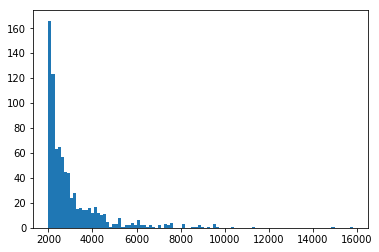

In [76]:
# lol = kkk.str.len().max()
# lol = lol[lol > 2000]
plt.hist(lol, bins=100)
plt.show()
# kkk[2918671]
# kkk.str.len().max()

In [47]:
# k = src.items.astype('|S')
# k.dtype
# src.items.dtype
kkk = df.iloc[:, 1]
# labels = np.array(kkk, dtype='S2')
# labels[0:10]

In [ ]:
acc_04 = partial(accuracy_thresh, thresh=0.4)
f_score = partial(fbeta, thresh=0.4)
acc_02 = partial(accuracy_thresh, thresh=0.2)

learn = cnn_learner(data, arch, pretrained=False, metrics=[f_score, acc_04, acc_02])
gc.collect();

In [ ]:
learn = learn.to_fp16()

In [ ]:
learn.lr_find()
learn.recorder.plot()